#### EU Cities Temperatures Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from matplotlib import pyplot as plt
from collections import Counter
import random
import math

#### Preprocessing/Analysis

**1. Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.**

In [2]:
df = pd.read_csv("EuCitiesTemperatures.csv")

In [3]:
countries = df['country']
latitude = {}
longitude = {}
for x in countries:
    if x not in latitude:
        latitude[x] = 0
        longitude[x] = 0
# finding average latitudes for each country
for ele in latitude.keys():
    latitude[ele] = round(df.loc[df['country'] == ele,'latitude'].mean(),2)
# finding average longitudes for each country
for ele in longitude.keys():
    longitude[ele] = round(df.loc[df['country'] == ele,'longitude'].mean(),2)
# replace NaN latitudes and longitudes with their average
for c in latitude.keys():
    df.loc[(df['country'] == c) & df['latitude'].isnull(), 'latitude'] = latitude[c]
    df.loc[(df['country'] == c) & df['longitude'].isnull(), 'longitude'] = longitude[c]
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


**2. Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)**

In [4]:
# create df of cities within the conditions
df_cities = df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]
df_cities

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.63,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.63,6.42
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,NaN
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


In [5]:
# here is a list of all cities within the conditions
city_list = df_cities['city'].tolist()
#city_list

In [6]:
# finding the maximum number of cities by counting the countries in df_cities
# could be more than 1 country with max cities
# returns list of countries with max cities
country_list = df_cities['country'].tolist()
country_count = Counter(country_list)
max_value = country_count.most_common(1)[0][1]
result = []
for ele in country_count.keys():
    if country_count[ele] == max_value:
        result.append(ele)
result

['Poland', 'Romania']

**3. Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no). For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')**

In [7]:
# base df before filling in missing temps
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [8]:
# 4 possible combinations are:
# EU: yes, coast: yes
# EU: yes, coast: no
# EU: no, coast: yes
# EU no, coast: no
# calculate avg value for each case
eYes_cYes = df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'yes'), 'temperature'].mean()
eYes_cNo = df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'no'), 'temperature'].mean()
eNo_cYes = df.loc[(df['EU'] == 'no') & (df['coastline'] == 'yes'), 'temperature'].mean()
eNo_cNo = df.loc[(df['EU'] == 'no') & (df['coastline'] == 'no'), 'temperature'].mean()

In [9]:
# replace NaNs with correct values
df.loc[df['temperature'].isnull() & (df['EU'] == 'yes') & (df['coastline'] == 'yes'), 'temperature'] = eYes_cYes
df.loc[df['temperature'].isnull() & (df['EU'] == 'yes') & (df['coastline'] == 'no'), 'temperature'] = eYes_cNo
df.loc[df['temperature'].isnull() & (df['EU'] == 'no') & (df['coastline'] == 'yes'), 'temperature'] = eNo_cYes
df.loc[df['temperature'].isnull() & (df['EU'] == 'no') & (df['coastline'] == 'no'), 'temperature'] = eNo_cNo
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


#### Visualization

**1. Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.**

In [10]:
# 4 regions
regions = ['EU-Coast', 'EU-Noncoast', 'NonEU-Coast', 'NonEU-NonCoast']
# calculate number of cities in each region
yy = df[(df['EU'] == 'yes') & (df['coastline'] == 'yes')].shape[0]
yn = df[(df['EU'] == 'yes') & (df['coastline'] == 'no')].shape[0]
ny = df[(df['EU'] == 'no') & (df['coastline'] == 'yes')].shape[0]
nn = df[(df['EU'] == 'no') & (df['coastline'] == 'no')].shape[0]
num_cities = [yy, yn, ny, nn]

<function matplotlib.pyplot.show(close=None, block=None)>

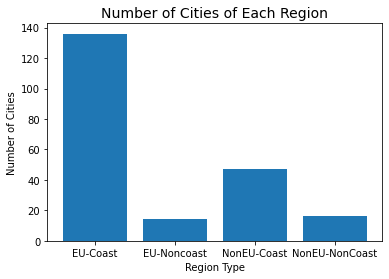

In [11]:
plt.bar(range(len(num_cities)), num_cities)
plt.xticks(range(len(num_cities)),regions)
plt.title('Number of Cities of Each Region', fontsize=14)
plt.ylabel('Number of Cities')
plt.xlabel('Region Type')
plt.show

**2. Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.**

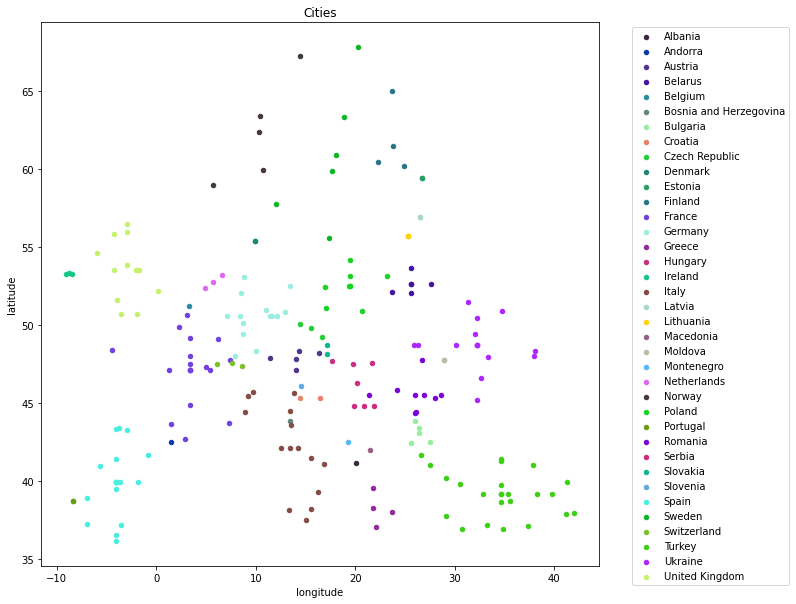

In [12]:
countries = df['country'].unique()
num_countries = len(countries)
#df['country'].value_counts()
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(num_countries)]
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
for countries,color in zip(countries,color):
    df2 = df[df['country'] == countries]    
    df2.plot('longitude','latitude',ax=ax,kind='scatter',color=color, label=countries,title='Cities')
# move legend outside of plot
ax.legend(bbox_to_anchor=(1.05,1))

**3. The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).**

In [13]:
#df

In [14]:
pop = df['population'].unique()
countries = df['country'].unique()

In [15]:
max_pop = math.ceil(max(pop))

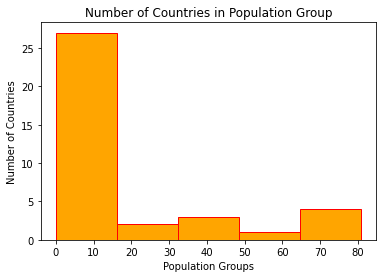

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(pop,bins=5,color='orange',edgecolor='red')
plt.ylabel('Number of Countries')
plt.xlabel('Population Groups')
plt.title('Number of Countries in Population Group')
plt.show()

**4. Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.**

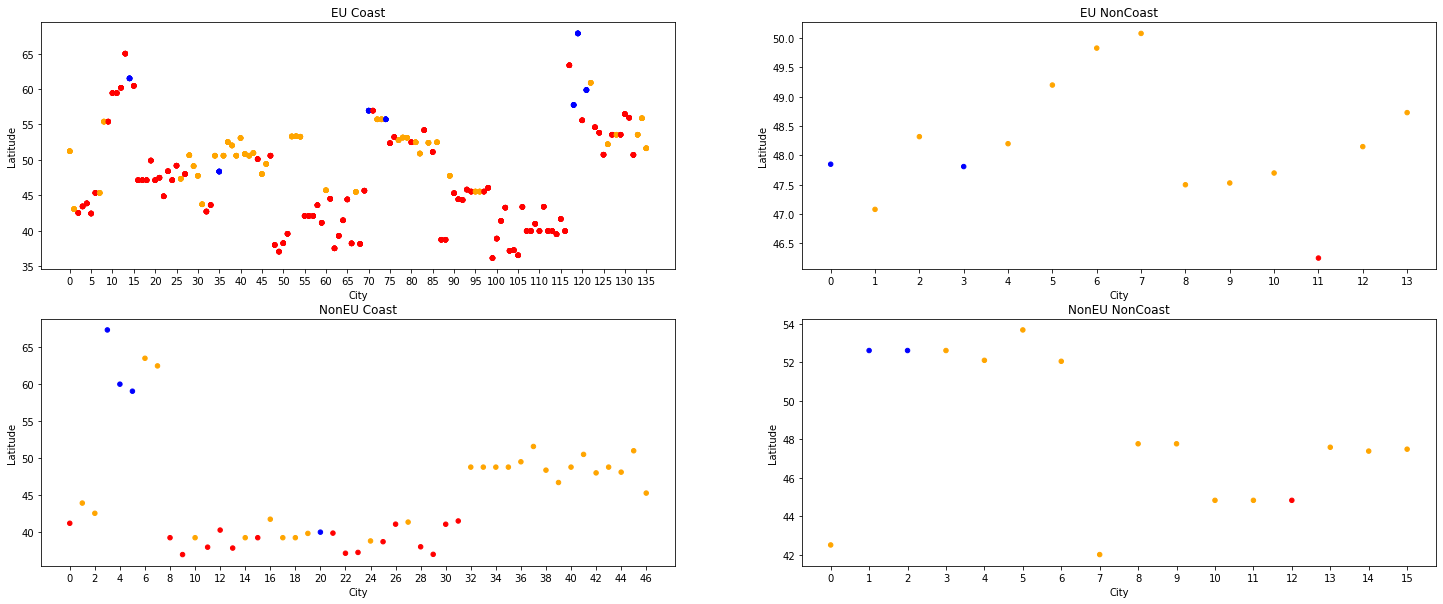

In [17]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(25,10)
# 0,0
temp = df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'yes'),('latitude','temperature')]
city_num = list(range(0, temp.shape[0]))
temp['index'] = city_num
col = np.where(temp['temperature'] < 6, 'blue', np.where(temp['temperature'] <= 10, 'orange', 'red'))
for city,color in zip(city_num,color):    
    temp.plot('index','latitude',ax=axs[0,0],xticks=range(0, temp.shape[0], 5),kind='scatter',color=col,title='EU Coast',xlabel='City',ylabel='Latitude')
# 1,0
temp = df.loc[(df['EU'] == 'yes') & (df['coastline'] == 'no'),('latitude','temperature')]
city_num = list(range(0, temp.shape[0]))
temp['index'] = city_num
col = np.where(temp['temperature'] < 6, 'blue', np.where(temp['temperature'] <= 10, 'orange', 'red'))
for city,color in zip(city_num,color):    
    temp.plot('index','latitude',ax=axs[0,1],xticks=range(0, temp.shape[0]),kind='scatter',color=col,title='EU NonCoast',xlabel='City',ylabel='Latitude')
# 1,0
temp = df.loc[(df['EU'] == 'no') & (df['coastline'] == 'yes'),('latitude','temperature')]
city_num = list(range(0, temp.shape[0]))
temp['index'] = city_num
col = np.where(temp['temperature'] < 6, 'blue', np.where(temp['temperature'] <= 10, 'orange', 'red'))
for city,color in zip(city_num,color):    
    temp.plot('index','latitude',ax=axs[1,0],xticks=range(0, temp.shape[0], 2),kind='scatter',color=col,title='NonEU Coast',xlabel='City',ylabel='Latitude')
# 1,1
temp = df.loc[(df['EU'] == 'no') & (df['coastline'] == 'no'),('latitude','temperature')]
city_num = list(range(0, temp.shape[0]))
temp['index'] = city_num
col = np.where(temp['temperature'] < 6, 'blue', np.where(temp['temperature'] <= 10, 'orange', 'red'))
for city,color in zip(city_num,color):    
    temp.plot('index','latitude',ax=axs[1,1],xticks=range(0, temp.shape[0]),kind='scatter',color=col,title='NonEU NonCoast',xlabel='City',ylabel='Latitude')